<a href="https://colab.research.google.com/github/PrathameshBawane/CODSOFT/blob/main/Task_4_Spam_Sms_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading and preprocessing the dataset**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset
file_path = "/content/drive/MyDrive/Datasets/spam.csv"
df = pd.read_csv(file_path, encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [19]:
df = df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])
df.columns = ['label', 'message']

In [20]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

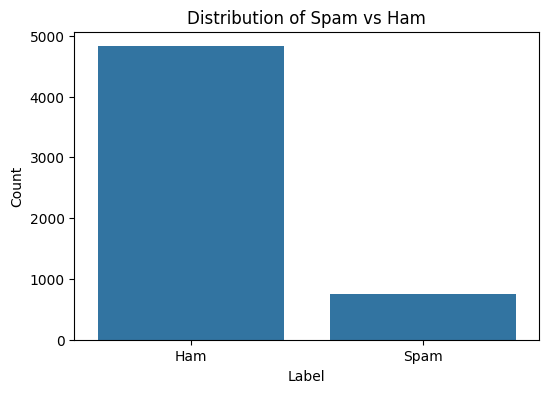

In [21]:
# Visualizing the dataset distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['label'])
plt.title('Distribution of Spam vs Ham')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.show()

In [22]:

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

In [23]:
# Displaying first few rows of the dataset
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#**Feature extraction using TF-IDF**

In [24]:
# Initializing the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer

TfidfVectorizer(stop_words='english')

In [25]:
# Fitting and transforming the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_train_tfidf

<4457x7472 sparse matrix of type '<class 'numpy.float64'>'
	with 34794 stored elements in Compressed Sparse Row format>

In [26]:
# Transforming the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)
X_test_tfidf

<1115x7472 sparse matrix of type '<class 'numpy.float64'>'
	with 7693 stored elements in Compressed Sparse Row format>

In [27]:
# Visualizing top TF-IDF features
def plot_tfidf_features(tfidf, vectorizer, top_n=20):
    indices = np.argsort(tfidf.toarray().mean(axis=0))[::-1][:top_n]
    features = np.array(vectorizer.get_feature_names_out())[indices]
    scores = tfidf[:, indices].toarray().mean(axis=0)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=scores, y=features)
    plt.title(f'Top {top_n} TF-IDF Features')
    plt.xlabel('TF-IDF Score')
    plt.ylabel('Features')
    plt.show()

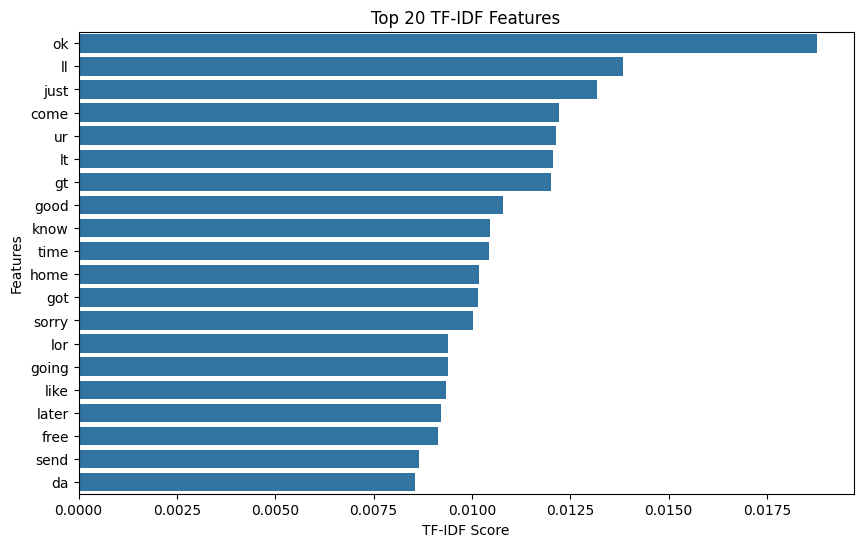

In [28]:
plot_tfidf_features(X_train_tfidf, tfidf_vectorizer)

# **Model Training**

In [31]:
# Initializing the classifiers
nb_classifier = MultinomialNB()
nb_classifier

MultinomialNB()

In [32]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier

LogisticRegression(max_iter=1000)

In [33]:
svc_classifier = SVC(kernel='linear')
svc_classifier

SVC(kernel='linear')

In [35]:
# Training the classifiers
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [37]:
lr_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [38]:
svc_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

# **Model Evaluation**

In [39]:
# Function to visualize confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [40]:
# Predicting and evaluating with Naive Bayes
y_pred_nb = nb_classifier.predict(X_test_tfidf)
y_pred_nb

array([0, 0, 0, ..., 0, 0, 1])

In [41]:
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_accuracy

0.9668161434977578

In [42]:
nb_report = classification_report(y_test, y_pred_nb)
nb_report

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98       965\n           1       1.00      0.75      0.86       150\n\n    accuracy                           0.97      1115\n   macro avg       0.98      0.88      0.92      1115\nweighted avg       0.97      0.97      0.96      1115\n'

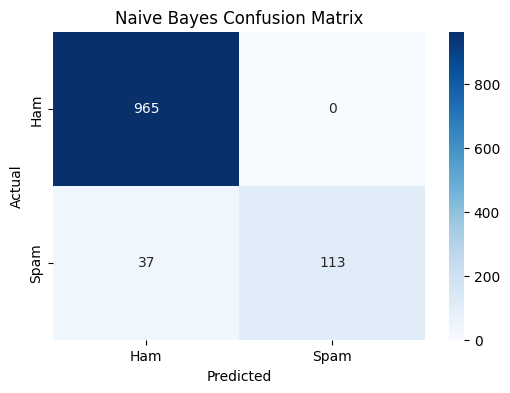

In [43]:
plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')

In [44]:
# Predicting and evaluating with Logistic Regression
y_pred_lr = lr_classifier.predict(X_test_tfidf)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

In [45]:
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_accuracy

0.9524663677130045

In [46]:
lr_report = classification_report(y_test, y_pred_lr)
lr_report

'              precision    recall  f1-score   support\n\n           0       0.95      1.00      0.97       965\n           1       0.97      0.67      0.79       150\n\n    accuracy                           0.95      1115\n   macro avg       0.96      0.83      0.88      1115\nweighted avg       0.95      0.95      0.95      1115\n'

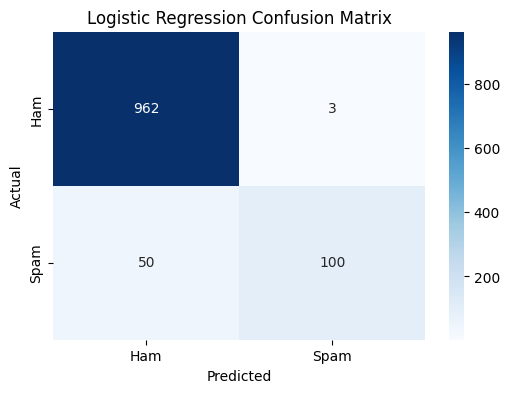

In [47]:
plot_confusion_matrix(y_test, y_pred_lr, 'Logistic Regression Confusion Matrix')

In [60]:
# Predicting and evaluating with SVM
y_pred_svc = svc_classifier.predict(X_test_tfidf)
y_pred_svc

array([0, 0, 1, ..., 0, 0, 1])

In [61]:
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_accuracy

0.979372197309417

In [62]:
svc_report = classification_report(y_test, y_pred_svc)
svc_report

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       965\n           1       0.97      0.87      0.92       150\n\n    accuracy                           0.98      1115\n   macro avg       0.98      0.93      0.95      1115\nweighted avg       0.98      0.98      0.98      1115\n'

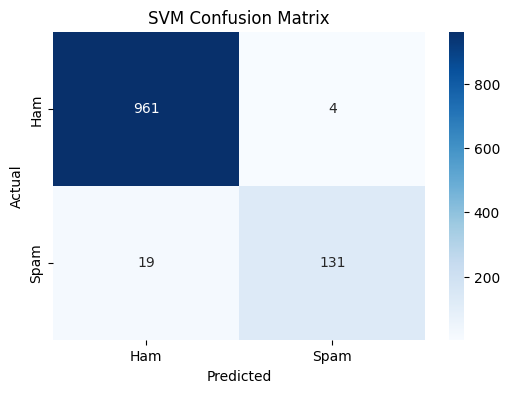

In [63]:
plot_confusion_matrix(y_test, y_pred_svc, 'SVM Confusion Matrix')

In [64]:
print("Naive Bayes Classifier:\n", nb_report)
print("Accuracy:", nb_accuracy)

Naive Bayes Classifier:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy: 0.9668161434977578


In [65]:

print("Logistic Regression Classifier:\n", lr_report)
print("Accuracy:", lr_accuracy)

Logistic Regression Classifier:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 0.9524663677130045


In [66]:
print("Support Vector Machine Classifier:\n", svc_report)
print("Accuracy:", svc_accuracy)

Support Vector Machine Classifier:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.979372197309417


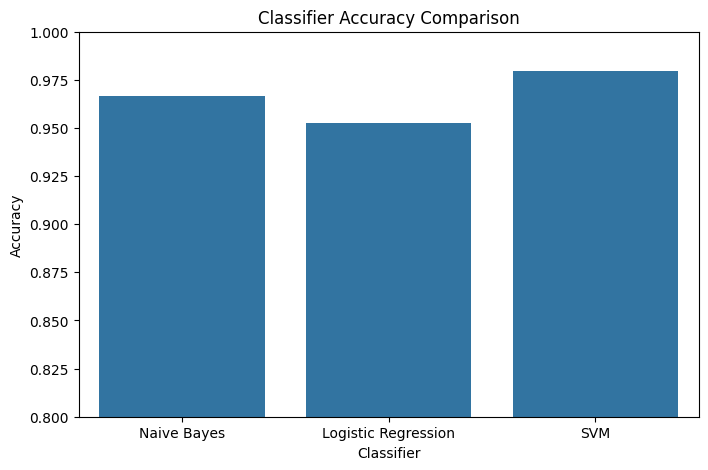

In [67]:
# Visualizing accuracy comparison
accuracy_scores = [nb_accuracy, lr_accuracy, svc_accuracy]
classifiers = ['Naive Bayes', 'Logistic Regression', 'SVM']

plt.figure(figsize=(8, 5))
sns.barplot(x=classifiers, y=accuracy_scores)
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.show()